#**Importing Libraries**

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#**Loading Dataset**

In [91]:
df=pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


#**Data Cleaning**

In [92]:
def clean_data(df):


    # Handling missing values
    # For numerical columns, using mean method
  numerical_columns = df.select_dtypes(include=np.number).columns
  for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

    # For categorical columns, use forward fill
  categorical_columns = df.select_dtypes(include='object').columns
  for col in categorical_columns:
    df[col].fillna(method='ffill', inplace=True)

    # Correct data types
    # Assuming columns that should be categorical
  categorical_columns = [' education', ' self_employed', ' loan_status']
  for col in categorical_columns:
    df[col] = df[col].astype('category')

    # Address inconsistent or erroneous data entries
    # ensuring binary columns have consistent values
  binary_columns = [' self_employed', ' loan_status']
  for col in binary_columns:
    df[col] = df[col].apply(lambda x: 'Yes' if x.lower() in ['yes', 'y'] else 'No' if x.lower() in ['no', 'n'] else x)

    # Standardize formats
    # For this dataset, we can assume monetary values should be integers
  monetary_columns = [' income_annum', ' loan_amount', ' residential_assets_value',
                        ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']
  for col in monetary_columns:
    df[col] = df[col].astype(int)

    # Ensure 'cibil_scor' and 'loan_terr' are integers
  df[' cibil_score'] = df[' cibil_score'].astype(int)
  df[' loan_term'] = df[' loan_term'].astype(int)

  # Apply label encoding to specified categorical columns
  for col in [' education', ' self_employed', ' loan_status']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

  return df

#**Exploratory Data Analysis**

In [93]:
def perform_eda(df):
  # Generate descriptive statistics
  desc_stats = df.describe(include='all')
  print("Descriptive Statistics:\n", desc_stats)

  # Create histograms for numerical columns
  numerical_columns = df.select_dtypes(include=np.number).columns
  df[numerical_columns].hist(figsize=(10, 10), bins=20)
  plt.title("Histogram for Numerical Columns")
  plt.tight_layout()
  plt.show()

  # Create bar charts for categorical columns
  categorical_columns = [' education', ' self_employed', ' loan_status']
  fig, axes = plt.subplots(1, 3, figsize=(15, 5))
  for col, ax in zip(categorical_columns, axes):
    df[col].value_counts().plot(kind='bar', ax=ax, title=col)
  plt.title("Relatinship Between Categorical column")
  plt.tight_layout()
  plt.show()


  # Create a correlation matrix
  corr_matrix = df.corr()
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
  plt.title('Correlation Matrix')
  plt.show()



#**Outlier Detection and Removal**

In [94]:
def detect_and_handle_outliers(df, threshold=1.5, cap=False):


    #Parameters:
    #df: pandas DataFrame
    #threshold: float, multiplier for IQR method (default is 1.5)
    #cap: bool, if True, caps outliers instead of removing them


  def cap_outliers(series, lower, upper):
    series = np.where(series < lower, lower, series)
    series = np.where(series > upper, upper, series)
    return series

  def remove_outliers_iqr(df, threshold):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

  numerical_columns = df.select_dtypes(include=np.number).columns

  if cap:
    for col in numerical_columns:
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - (threshold * IQR)
      upper_bound = Q3 + (threshold * IQR)
      df[col] = cap_outliers(df[col], lower_bound, upper_bound)
  else:
    df = remove_outliers_iqr(df, threshold)

  return df

#Visualize outliers
def plot_box_plots(df, title):
    # Set up the matplotlib figure
    plt.figure(figsize=(20, 12))

    # Plot a box plot for each numerical column
    numerical_columns = df.select_dtypes(include=np.number).columns
    num_columns = len(numerical_columns)

    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(2, (num_columns // 2) + 1, i)
        sns.boxplot(y=df[col])
        plt.title(col)

    plt.suptitle(title, y=1.05)
    plt.tight_layout()
    plt.show()

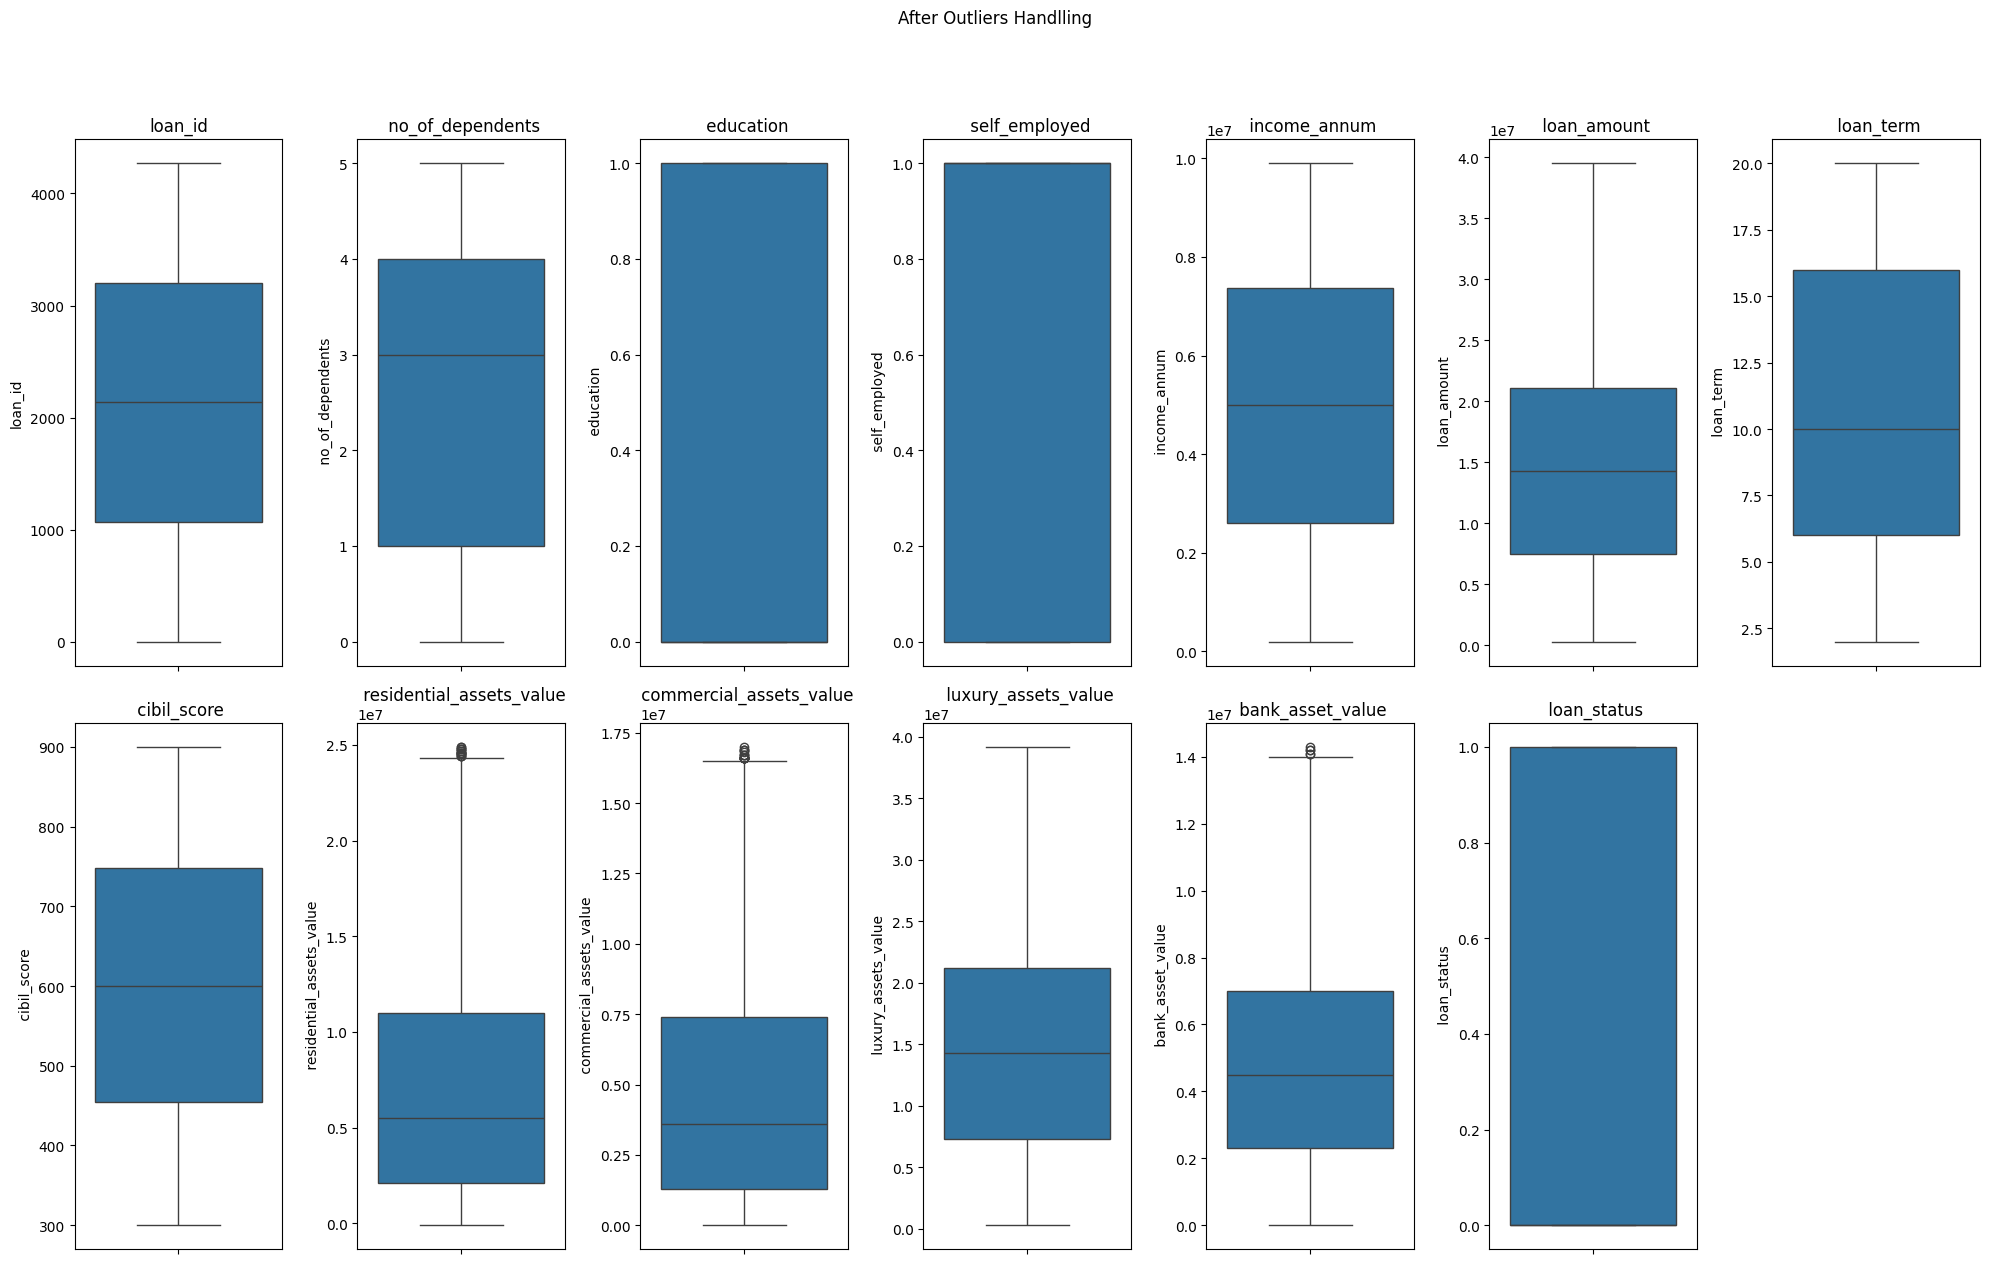

Descriptive Statistics:
            loan_id   no_of_dependents    education   self_employed  \
count  4178.000000        4178.000000  4178.000000     4178.000000   
mean   2135.869794           2.499521     0.495452        0.503351   
std    1230.938364           1.694991     0.500039        0.500049   
min       2.000000           0.000000     0.000000        0.000000   
25%    1073.250000           1.000000     0.000000        0.000000   
50%    2137.500000           3.000000     0.000000        1.000000   
75%    3201.750000           4.000000     1.000000        1.000000   
max    4269.000000           5.000000     1.000000        1.000000   

        income_annum   loan_amount    loan_term   cibil_score  \
count   4.178000e+03  4.178000e+03  4178.000000   4178.000000   
mean    4.964361e+06  1.487621e+07    10.887027    600.193873   
std     2.761380e+06  8.933808e+06     5.706505    172.298735   
min     2.000000e+05  3.000000e+05     2.000000    300.000000   
25%     2.600000e+0

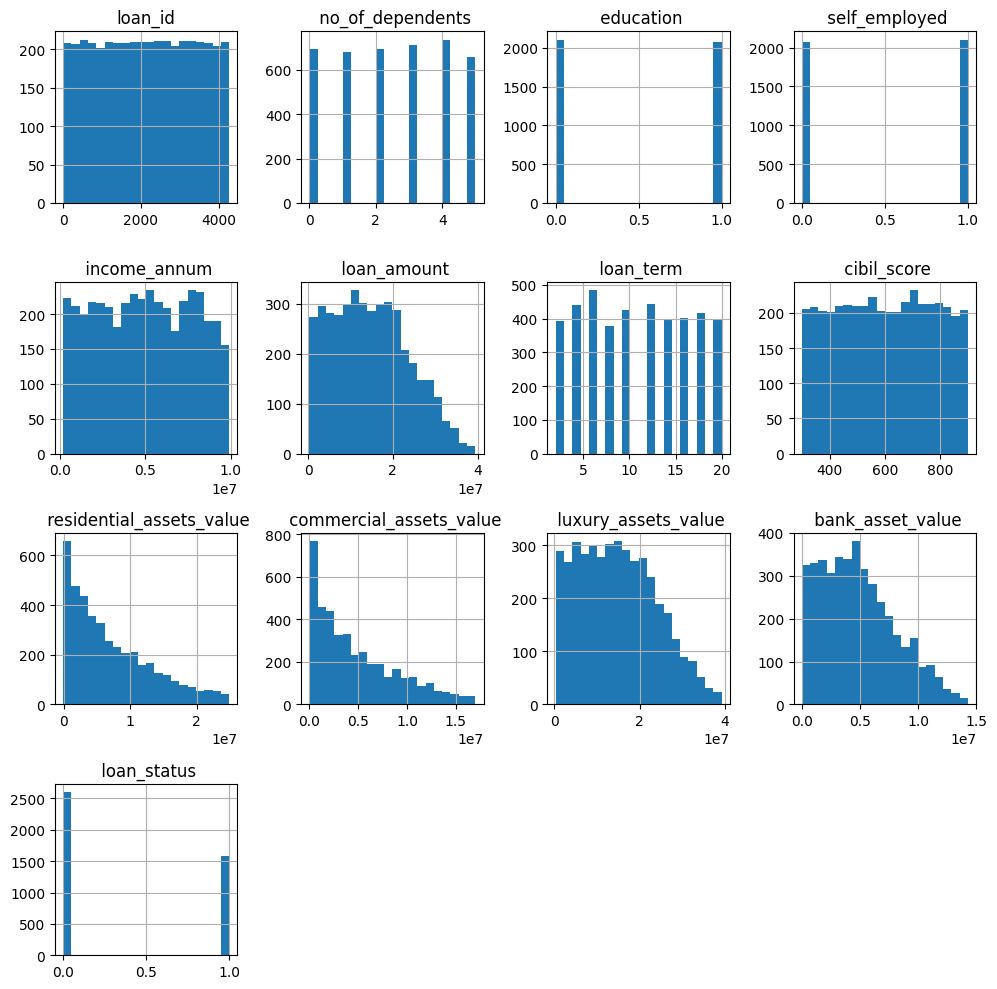

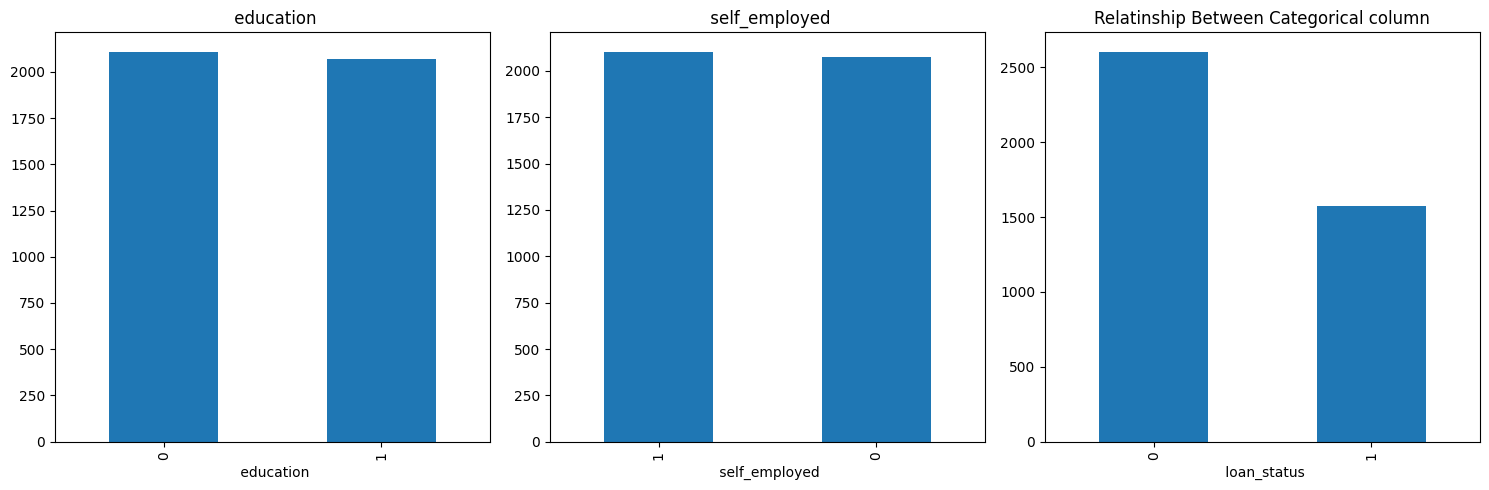

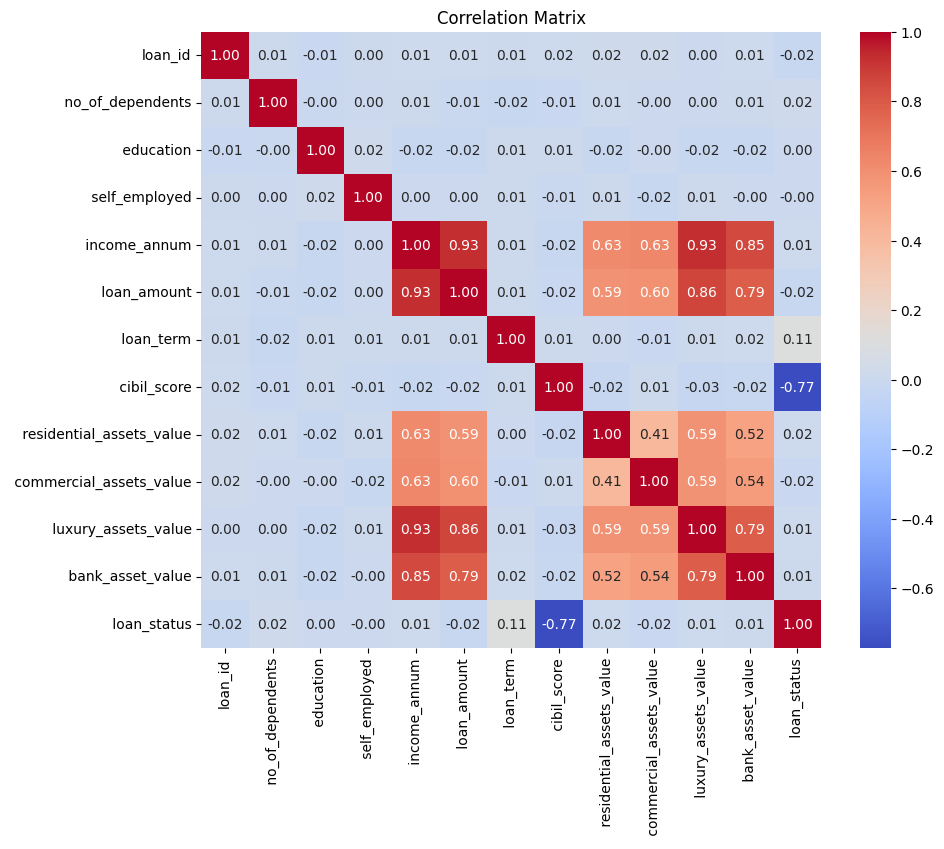

In [95]:
df_cleaned = clean_data(df)
df_cleaned.head()
df_no_outliers = detect_and_handle_outliers(df_cleaned, threshold=1.5, cap=False)
plot_box_plots(df_no_outliers,"After Outliers Handlling")

perform_eda(df_no_outliers)

In [96]:
df_no_outliers.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
5,6,0,0,1,4800000,13500000,10,319,6800000,8300000,13700000,5100000,1


#**Manual Data Splitting**

In [97]:
X=df_no_outliers.drop(" loan_status",axis=1)
y=df_no_outliers[" loan_status"]
print(X.shape)
print(y.shape)

(4178, 12)
(4178,)


In [98]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

#**Model Training**

In [99]:
from sklearn.neighbors import KNeighborsClassifier
# Train a KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

#**Model Evaluation**

Test Accuracy:  0.5538277511961722
Precision:  0.3858267716535433
Recall:  0.3111111111111111
F1 Score:  0.3444639718804921


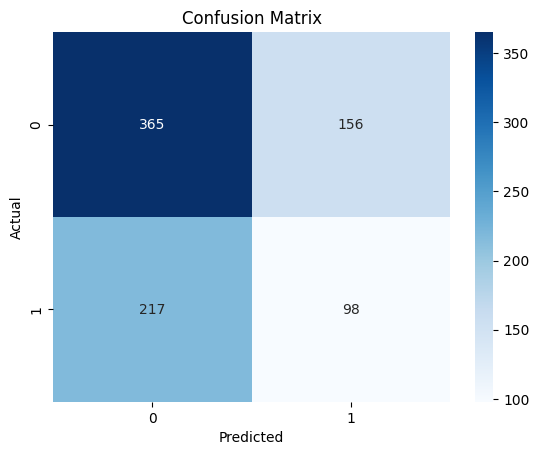

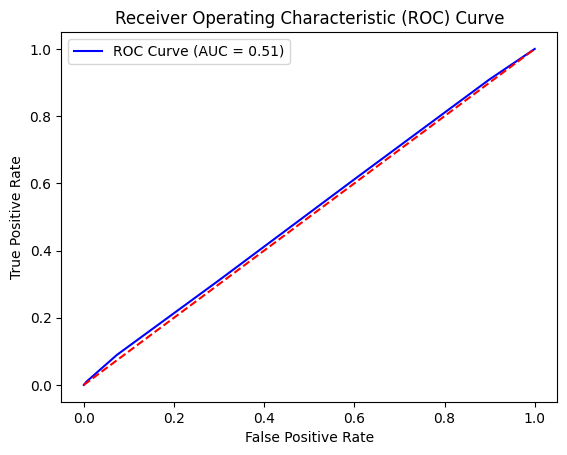

ROC-AUC Score: 0.51
Cross-Validation Scores (Accuracy):  [0.55306428 0.58146487 0.55988024 0.55239521 0.57784431]
Average Cross-Validation Score (Accuracy):  0.564929781692221
Cross-Validation Scores (Precision):  [0.37297297 0.42134831 0.38202247 0.38308458 0.40853659]
Average Cross-Validation Score (Precision):  0.3935929843940217
Cross-Validation Scores (Recall):  [0.27380952 0.29761905 0.26984127 0.30555556 0.26587302]
Average Cross-Validation Score (Recall):  0.28253968253968254
Cross-Validation Scores (F1 Score):  [0.31578947 0.34883721 0.31627907 0.33995585 0.32211538]
Average Cross-Validation Score (F1 Score):  0.3285953974517975


In [100]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
# Evaluate the model on the test set
test_accuracy = knn.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)

# Predict the target values on the test set
y_pred = knn.predict(X_test)
# print("Prediction of target values on the test set:  ", y_pred)
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and F1 scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print(f"ROC-AUC Score: {roc_auc:.2f}")

# Implement cross-validation to assess the performance of the KNN model
cv_scores_accuracy = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_precision = cross_val_score(knn, X_train, y_train, cv=5, scoring='precision')
cv_scores_recall = cross_val_score(knn, X_train, y_train, cv=5, scoring='recall')
cv_scores_f1 = cross_val_score(knn, X_train, y_train, cv=5, scoring='f1')

print("Cross-Validation Scores (Accuracy): ", cv_scores_accuracy)
print("Average Cross-Validation Score (Accuracy): ", cv_scores_accuracy.mean())

print("Cross-Validation Scores (Precision): ", cv_scores_precision)
print("Average Cross-Validation Score (Precision): ", cv_scores_precision.mean())

print("Cross-Validation Scores (Recall): ", cv_scores_recall)
print("Average Cross-Validation Score (Recall): ", cv_scores_recall.mean())

print("Cross-Validation Scores (F1 Score): ", cv_scores_f1)
print("Average Cross-Validation Score (F1 Score): ", cv_scores_f1.mean())

##**KNN accuracy:  55%**